# Forecasting Assignment Instructions

Build a prophet model to predict the hourly data in the week (monday-sunday) of Waitangi Day in 2018. You can use as little or as much data as you like (so start from 2012, or 2014 or something else, you choose).

Visualise the results by making a plot like we do in class (model predictions, true values, uncertainty) AND quantify the results by calculating RMSE, MAE and MAPE. Implement the formulas yourself for these performance stats and do not use a package or library for this.

Interpret your results: write what you think of the performance, does your model work or not. Should it not work, give an explanation why.

In [101]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [259]:
import pandas as pd
import numpy as np
import os

from prophet import Prophet
import holidays

import matplotlib.pyplot as plt

In [260]:
dataframe = pd.read_csv("cycling_Auckland/cycling_counts_by_day.txt")
dataframe

,datetime,Tamaki Drive EB
0,2010-07-01,570.0
1,2010-07-02,473.0
2,2010-07-03,766.0
3,2010-07-04,240.0
4,2010-07-05,172.0
...,...,...
2887,2018-05-27,235.0
2888,2018-05-28,709.0
2889,2018-05-29,859.0
2890,2018-05-30,787.0


In [261]:
dataframe = dataframe.reset_index(drop = True)
dataframe['datetime'] = pd.to_datetime(dataframe['datetime'])
dataframe = dataframe.sort_values(by = 'datetime') #or dataframe.groupby(by=['datetime'])
dataframe

,datetime,Tamaki Drive EB
0,2010-07-01,570.0
1,2010-07-02,473.0
2,2010-07-03,766.0
3,2010-07-04,240.0
4,2010-07-05,172.0
...,...,...
2887,2018-05-27,235.0
2888,2018-05-28,709.0
2889,2018-05-29,859.0
2890,2018-05-30,787.0


In [262]:
dataframe.columns = ['ds', 'y'] #or dataframe.rename(columns = {"datetime":"ds", "Tamaki Drive EB":"y"}, inplace=True)
dataframe

,ds,y
0,2010-07-01,570.0
1,2010-07-02,473.0
2,2010-07-03,766.0
3,2010-07-04,240.0
4,2010-07-05,172.0
...,...,...
2887,2018-05-27,235.0
2888,2018-05-28,709.0
2889,2018-05-29,859.0
2890,2018-05-30,787.0


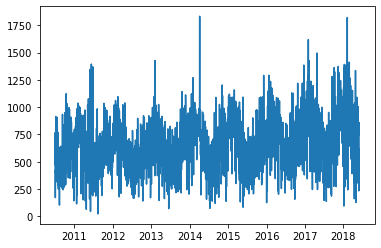

In [263]:
plt.plot(dataframe["ds"], dataframe["y"])

# Prophet Forecasting

In [323]:
train = dataframe[dataframe['ds'] < '2018-02-05']
test = dataframe[dataframe['ds'] >= '2018-02-05']

print(train.tail())
print(test.head())

             ds       y
2771 2018-01-31  1070.0
2772 2018-02-01   343.0
2773 2018-02-02   950.0
2774 2018-02-03   571.0
2775 2018-02-04   768.0
             ds       y
2776 2018-02-05   850.0
2777 2018-02-06  1820.0
2778 2018-02-07  1060.0
2779 2018-02-08  1176.0
2780 2018-02-09   531.0


In [324]:
m = Prophet(weekly_seasonality=7*12)
m.fit(train)

20:45:44 - cmdstanpy - INFO - Chain [1] start processing
20:45:46 - cmdstanpy - INFO - Chain [1] done processing


In [325]:
test.shape

(116, 2)

In [322]:
days = test.shape[0]
future = m.make_future_dataframe(periods = days, freq='H')
future

,ds
0,2010-07-01 00:00:00
1,2010-07-02 00:00:00
2,2010-07-03 00:00:00
3,2010-07-04 00:00:00
4,2010-07-05 00:00:00
...,...
2887,2018-01-06 03:00:00
2888,2018-01-06 04:00:00
2889,2018-01-06 05:00:00
2890,2018-01-06 06:00:00


In [284]:
forecast = m.predict(future)
forecast['truth'] = dataframe['y']
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,truth
0,2010-07-01 00:00:00,577.140456,161.272751,641.935768,577.140456,577.140456,-186.999527,-186.999527,-186.999527,29.101613,...,-14.703907,-14.703907,-201.397233,-201.397233,-201.397233,0.0,0.0,0.0,390.140929,570.0
1,2010-07-02 00:00:00,577.140948,111.526563,593.079112,577.140948,577.140948,-228.811429,-228.811429,-228.811429,29.101613,...,-53.938450,-53.938450,-203.974592,-203.974592,-203.974592,0.0,0.0,0.0,348.329519,473.0
2,2010-07-03 00:00:00,577.141440,157.073113,652.317404,577.141440,577.141440,-166.158566,-166.158566,-166.158566,29.101613,...,10.555888,10.555888,-205.816067,-205.816067,-205.816067,0.0,0.0,0.0,410.982875,766.0
3,2010-07-04 00:00:00,577.141932,178.257487,658.375269,577.141932,577.141932,-152.949666,-152.949666,-152.949666,29.101613,...,24.864326,24.864326,-206.915604,-206.915604,-206.915604,0.0,0.0,0.0,424.192267,240.0
4,2010-07-05 00:00:00,577.142424,142.431687,624.252720,577.142424,577.142424,-204.389303,-204.389303,-204.389303,29.101613,...,-26.208040,-26.208040,-207.282876,-207.282876,-207.282876,0.0,0.0,0.0,372.753121,172.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2951,2018-02-11 08:00:00,794.574121,748.285539,1227.112148,794.574121,794.574121,188.732036,188.732036,188.732036,-3.637702,...,-9.072059,-9.072059,201.441797,201.441797,201.441797,0.0,0.0,0.0,983.306157,NaN
2952,2018-02-11 09:00:00,794.579973,732.761733,1211.684936,794.579973,794.579973,181.287088,181.287088,181.287088,-7.275403,...,-12.949617,-12.949617,201.512109,201.512109,201.512109,0.0,0.0,0.0,975.867061,NaN
2953,2018-02-11 10:00:00,794.585825,732.570475,1219.113117,794.585825,794.585825,178.693581,178.693581,178.693581,-6.300684,...,-16.588073,-16.588073,201.582337,201.582337,201.582337,0.0,0.0,0.0,973.279406,NaN
2954,2018-02-11 11:00:00,794.591677,756.042957,1213.649394,794.591677,794.591677,179.473439,179.473439,179.473439,-2.233601,...,-19.945436,-19.945436,201.652476,201.652476,201.652476,0.0,0.0,0.0,974.065116,NaN


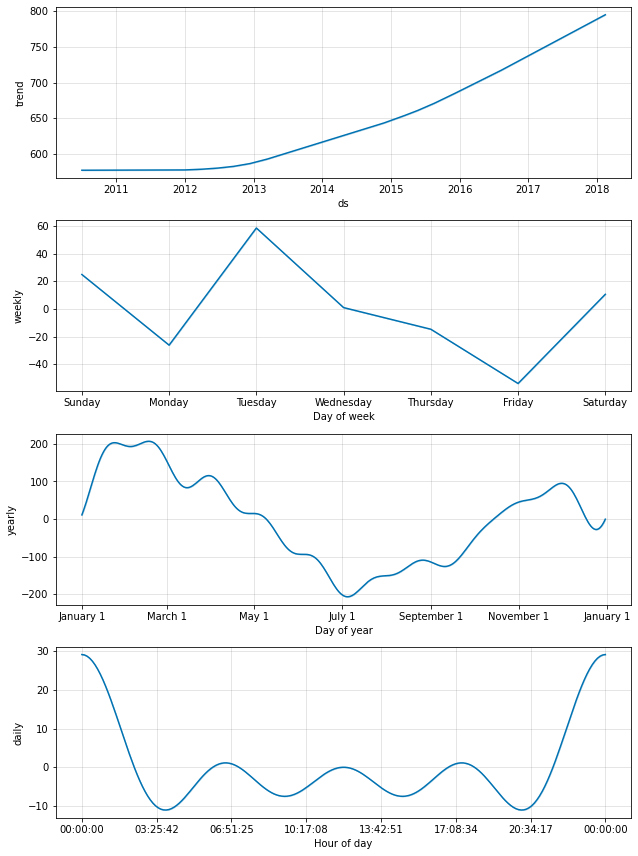

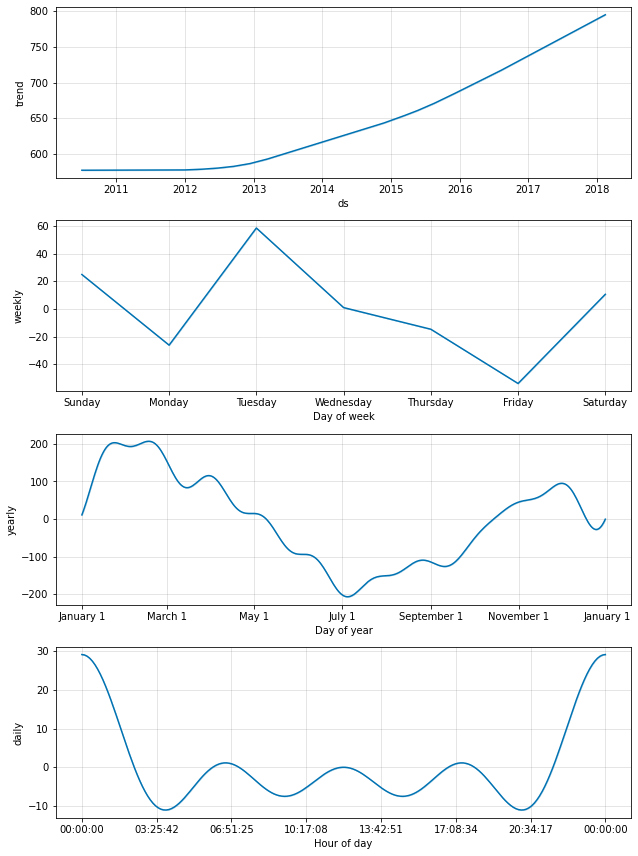

In [271]:
m.plot_components(forecast)

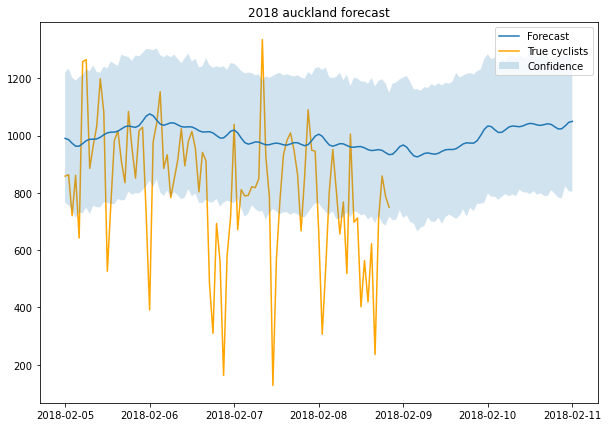

In [273]:
forecast_plot = forecast[np.logical_and(forecast['ds'] >= '2018-02-05', forecast['ds'] <= '2018-02-11' )]

plt.figure(figsize = (10,7))
plt.plot(forecast_plot['ds'], forecast_plot['yhat'], label='Forecast', zorder = 1)
plt.plot(forecast_plot['ds'], forecast_plot['truth'], label='True cyclists', zorder = 0, color = 'orange')                                                                                       
plt.fill_between(forecast_plot['ds'], forecast_plot['yhat_upper'], forecast_plot['yhat_lower'],
                 alpha=.2, label='Confidence')
plt.title('2018 auckland forecast')
plt.legend()
plt.show()

In [ ]:
dataframe['dti'].values[dataframe['dti'].values > 40] = 40
dataframe['dti'].values[dataframe['dti'].values < 0] = 0

In [ ]:
dataframe['open_acc'].values[dataframe['open_acc'].values > 30] = 30

In [ ]:
dataframe['revol_util'].values[dataframe['revol_util'].values > 100] = 100

In [ ]:
dataframe['mo_sin_rcnt_rev_tl_op'].values[dataframe['mo_sin_rcnt_rev_tl_op'].values > 36] = 36

In [ ]:
dataframe['mo_sin_rcnt_tl'].values[dataframe['mo_sin_rcnt_tl'].values > 36] = 36